**지도학습 알고리즘**   
* Classification : 샘플을 몇 개의 클래스 중 하나로 분류
  * 길이와 무게가 있을 때 도미인가 빙어인가
* Regression : 임의의 어떤 숫자를 예측
  * 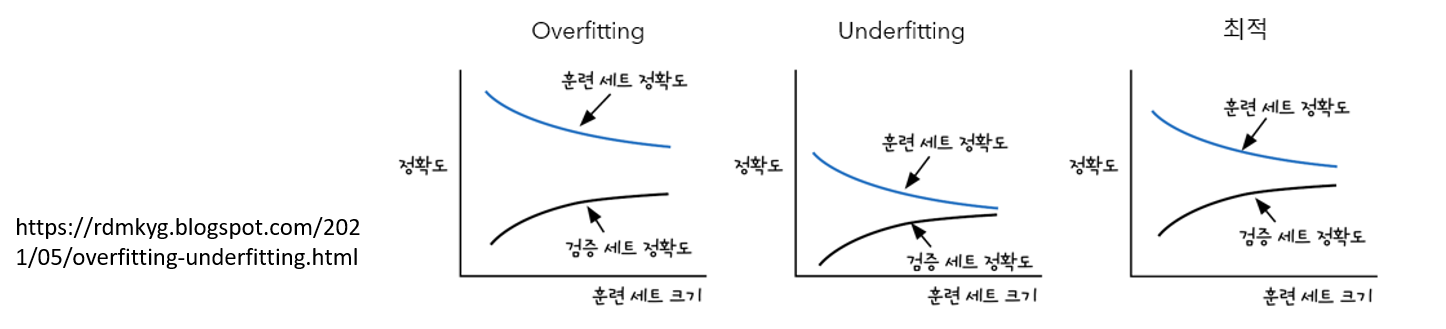농어의 길이, 높이, 두께가 주어졌을 때 무게는?


In [119]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
fish = pd.read_csv("Fish.csv")
fish[:][fish["Species"] == "Perch"].head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415


In [120]:
perch_length = fish["Length2"][fish["Species"] == "Perch"].to_numpy()
perch_weight = fish["Weight"][fish["Species"] == "Perch"].to_numpy()
print(perch_length.shape, perch_weight.shape)

(56,) (56,)


*농어의 길이에 따라 무게가 비례하는 형태*

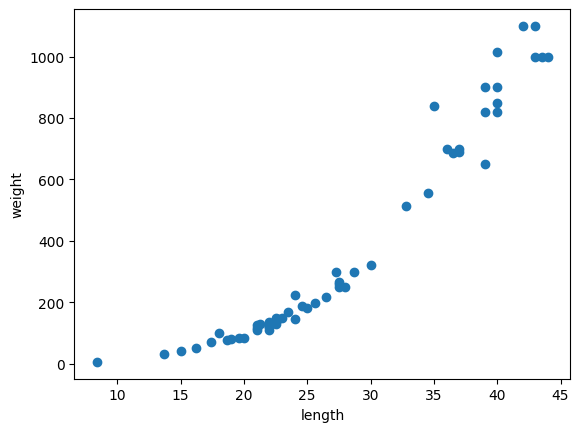

In [121]:
plt.scatter(perch_length, perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

##***Data Split***

In [122]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(42,) (14,)
(42,) (14,)


2차원 배열 형태로 변경

In [123]:
train_input, test_input = train_input.reshape(-1, 1), test_input.reshape(test_input.size, 1)
print(train_input[:5], test_input[:5], sep = "\n\n")

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]]

[[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]]


##***회귀 모델 훈련***

In [124]:
knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

KNeighborsRegressor()

점수

In [125]:
r1 = knr.score(test_input, test_target)
print(r1)
target_predict = (test_target - knr.predict(test_input)) ** 2
target_mean = (test_target - train_input.mean()) ** 2
print(np.sum(target_predict / target_mean))

0.992809406101064
6.044027695132893


정답과 예측 값 사이

In [126]:
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae) # 19g 정도는 차이남

19.157142857142862


## ***과대적합과 과소적합***   
* 과대적합(Overfitting) : 훈련 점수는 좋은데 테스트 점수가 나쁜경우
* 과소적합(Underfitting) : 훈련 점수보다 테스트 점수가 더 높거나, 둘 다 나쁜경우

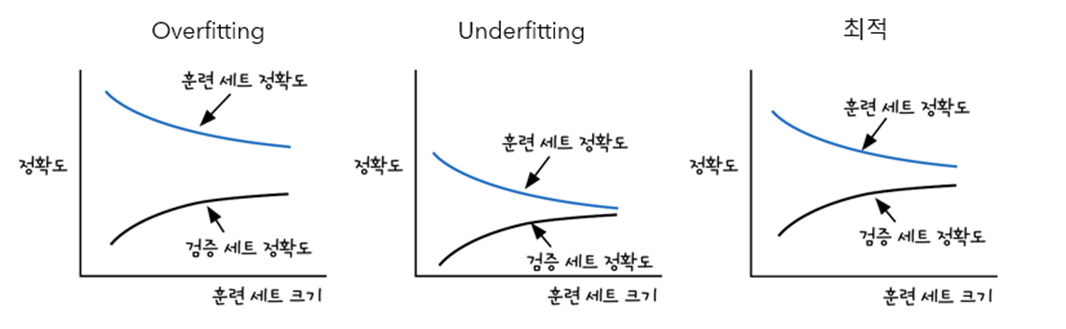

In [127]:
훈련점수, 테스트점수 = knr.score(train_input, train_target), knr.score(test_input, test_target)
print(훈련점수)
print(테스트점수)
# 테스트 점수가 더 높기때문에 과소적합으로 판단

0.9698823289099254
0.992809406101064


In [128]:
# 이웃 개수를 줄여 복잡하게 만들어 준다. ?
# 국지적 패턴이 민감해져서 복잡한 모델이됨
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


***n_neighbors 값 변경에 따른 모델 튜닝***

예측하고 싶은 값 [[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
  29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]]


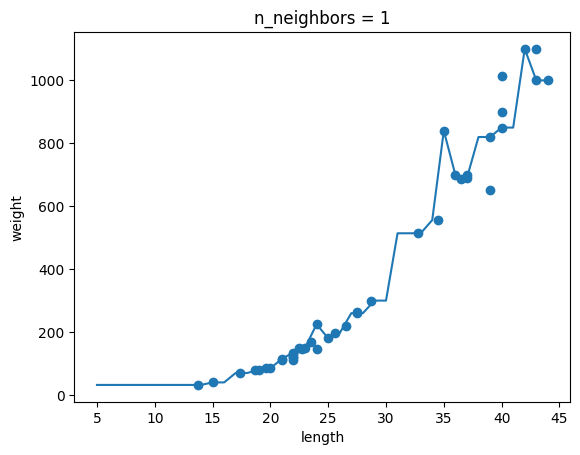

훈련 점수 0.9852830341215901
테스트 점수 0.991309195814175
적합



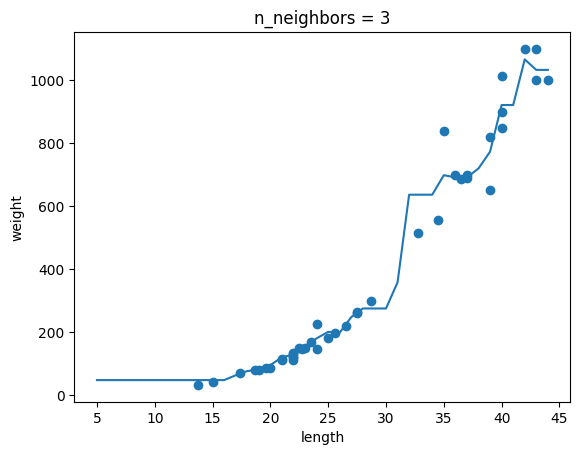

훈련 점수 0.9804899950518966
테스트 점수 0.9746459963987609
적합



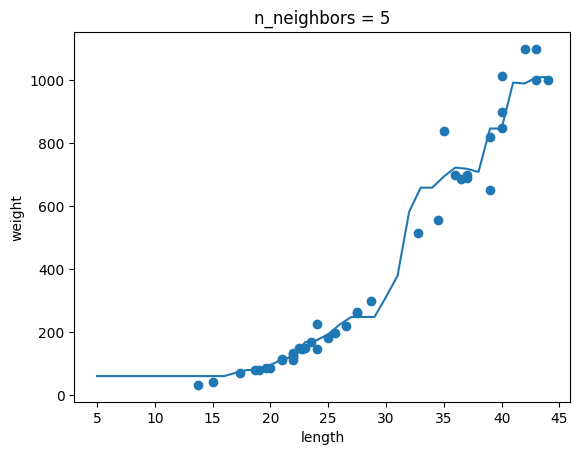

훈련 점수 0.9698823289099254
테스트 점수 0.992809406101064
과소적합



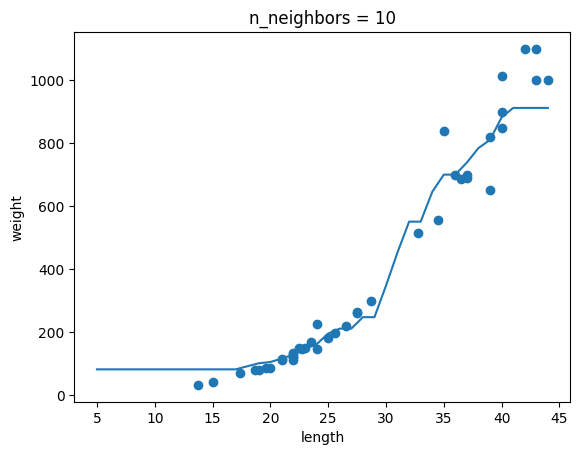

훈련 점수 0.96164569026043
테스트 점수 0.9737908255822255
과소적합



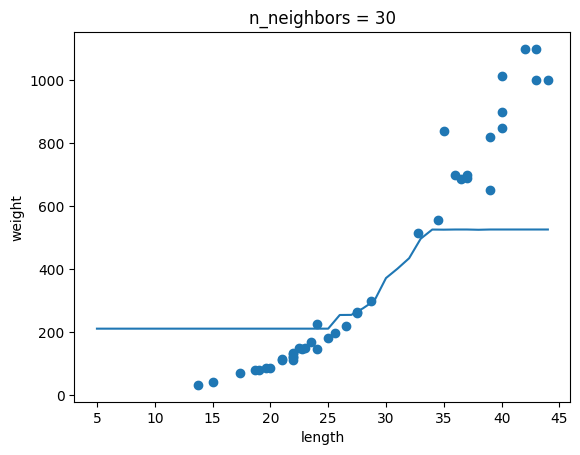

훈련 점수 0.5877976356145709
테스트 점수 0.6035123570454171
과소적합



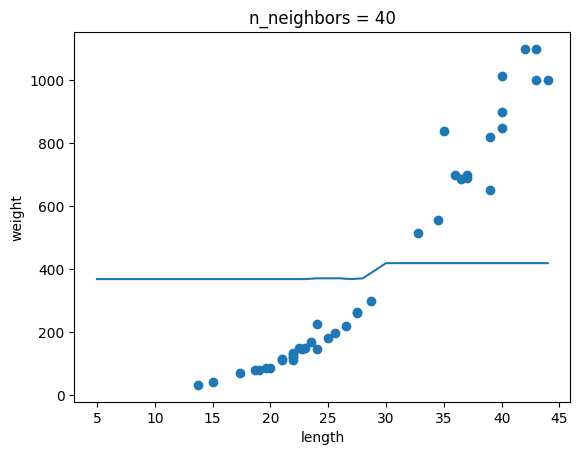

훈련 점수 0.12405965638610039
테스트 점수 0.08821534628596917
과소적합



In [129]:
knr = KNeighborsRegressor()

x = np.arange(5, 45).reshape(-1, 1)
print("예측하고 싶은 값", x.reshape(1, -1))
for n in (1, 3, 5, 10, 30, 40):
  knr.n_neighbors = n
  knr.fit(train_input, train_target)

  prediction = knr.predict(x)

  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.title(f"n_neighbors = {n}")
  plt.xlabel("length")
  plt.ylabel("weight")
  plt.show()

  TRAIN = knr.score(train_input, train_target)
  TEST = knr.score(test_input, test_target)
  print("훈련 점수", TRAIN)
  print("테스트 점수",TEST)
  if 0.97 <= TRAIN and 0.97 <= TEST : print("적합")
  elif TRAIN < TEST or TRAIN <= 0.7 and TEST <= 0.7: print("과소적합")
  else : print("과대적합")
  print()